### An example showing how BICePs works with current scripts
Dataset: cyclic hairpin
> In BICePs 2.0 there are 4 parts in calculation: 
1/ preparation, 
2/ initialization, 
3/ posterior sampling, 
4/ MBAR analysis and plot figures

In [3]:
import sys, os, glob
sys.path.append('src') # source code path 
from Preparation import * # import Preparation class for BICePs input files generation
from Restraint import *  # import Restraint class for initialization 
from PosteriorSampler import *   # import Posterior Sampling class
from Analysis import *    # import Analysis class for MBAR calculation and figures

In [3]:
#########################################
# Lets' create input files for BICePs
############ Preparation ################
# Specify necessary argument values
path='cs_H/cs/H/*txt' # only amide H is used in this example
states=50       # number of states from Markov state models
indices='cs_H/cs_indices_NH.txt'    # indices of experimental data
exp_data='cs_H/chemical_shift_NH.txt'  # raw experimental data
top='cs_H/8690.pdb'    # topology file
data_dir=path     
out_dir='test_cs_H'    # output directory

p=Preparation('cs_H',states=states,indices=indices,exp_data=exp_data,top=top,data_dir=data_dir)
p.write(out_dir=out_dir)


Wrote test_cs_H/0.cs_H
Wrote test_cs_H/1.cs_H
Wrote test_cs_H/2.cs_H
Wrote test_cs_H/3.cs_H
Wrote test_cs_H/4.cs_H
Wrote test_cs_H/5.cs_H
Wrote test_cs_H/6.cs_H
Wrote test_cs_H/7.cs_H
Wrote test_cs_H/8.cs_H
Wrote test_cs_H/9.cs_H
Wrote test_cs_H/10.cs_H
Wrote test_cs_H/11.cs_H
Wrote test_cs_H/12.cs_H
Wrote test_cs_H/13.cs_H
Wrote test_cs_H/14.cs_H
Wrote test_cs_H/15.cs_H
Wrote test_cs_H/16.cs_H
Wrote test_cs_H/17.cs_H
Wrote test_cs_H/18.cs_H
Wrote test_cs_H/19.cs_H
Wrote test_cs_H/20.cs_H
Wrote test_cs_H/21.cs_H
Wrote test_cs_H/22.cs_H
Wrote test_cs_H/23.cs_H
Wrote test_cs_H/24.cs_H
Wrote test_cs_H/25.cs_H
Wrote test_cs_H/26.cs_H
Wrote test_cs_H/27.cs_H
Wrote test_cs_H/28.cs_H
Wrote test_cs_H/29.cs_H
Wrote test_cs_H/30.cs_H
Wrote test_cs_H/31.cs_H
Wrote test_cs_H/32.cs_H
Wrote test_cs_H/33.cs_H
Wrote test_cs_H/34.cs_H
Wrote test_cs_H/35.cs_H
Wrote test_cs_H/36.cs_H
Wrote test_cs_H/37.cs_H
Wrote test_cs_H/38.cs_H
Wrote test_cs_H/39.cs_H
Wrote test_cs_H/40.cs_H
Wrote test_cs_H/41.cs_H
Wr

In [4]:
#########################################
# Let's create our ensemble of structures
############ Initialization #############
# Specify necessary argument values

dataFiles = 'test_cs_H'   # directory including all input files
data = sort_data(dataFiles)  # sort input files and figure out what observables are used
energies_filename =  'energy.txt'  # energy file computed from MSM populations
energies = loadtxt(energies_filename)
energies -= energies.min()  # set ground state to zero, just in case
outdir = 'results_ref_normal'
# Temporarily placing the number of steps here...
nsteps = 1000 # 10000000
"""OUTPUT

    Files written:
        <outdir>/traj_lambda_<lambda>.yaml  - YAML Trajectory file
        <outdit>/sampler_<lambda>.pkl       - a cPickle'd sampler object
"""
# Make a new directory if we have to
if not os.path.exists(outdir):
    os.mkdir(outdir)


In [5]:
lambda_values = [0.0,1.0]      # lambda values to be sampled
for j in lambda_values:
    verbose = False
    lam = j
    # We will instantiate a number of Structure() objects to construct the ensemble
    ensemble = []
    for i in range(energies.shape[0]):
        print
        print '#### STRUCTURE %d ####'%i
        if verbose:
            print data[i]
        s = Restraint('8690.pdb',lam,energies[i],data = data[i])
        if verbose:
            print 's.sse_cs_H', s.sse_cs_H
        ensemble.append( s )



  ##########################################
  # Next, let's do some posterior sampling
  ########## Posterior Sampling ############

    sampler = PosteriorSampler(ensemble)

    sampler.sample(nsteps)  # number of steps
    print 'Processing trajectory...',
    sampler.traj.process()  # compute averages, etc.
    print '...Done.'

    print 'Writing results...',
    sampler.traj.write_results(os.path.join(outdir,'traj_lambda%2.2f.yaml'%lam))
    print '...Done.'

    # pickle the sampler object
    print 'Pickling the sampler object ...',
    outfilename = 'sampler_lambda%2.2f.pkl'%lam
    print outfilename,
    fout = open(os.path.join(outdir, outfilename), 'wb')
    # Pickle dictionary using protocol 0.
    cPickle.dump(sampler, fout)
    fout.close()
    print '...Done.'




#### STRUCTURE 0 ####
test_cs_H/0.cs_H

#### STRUCTURE 1 ####
test_cs_H/1.cs_H

#### STRUCTURE 2 ####
test_cs_H/2.cs_H

#### STRUCTURE 3 ####
test_cs_H/3.cs_H

#### STRUCTURE 4 ####
test_cs_H/4.cs_H

#### STRUCTURE 5 ####
test_cs_H/5.cs_H

#### STRUCTURE 6 ####
test_cs_H/6.cs_H

#### STRUCTURE 7 ####
test_cs_H/7.cs_H

#### STRUCTURE 8 ####
test_cs_H/8.cs_H

#### STRUCTURE 9 ####
test_cs_H/9.cs_H

#### STRUCTURE 10 ####
test_cs_H/10.cs_H

#### STRUCTURE 11 ####
test_cs_H/11.cs_H

#### STRUCTURE 12 ####
test_cs_H/12.cs_H

#### STRUCTURE 13 ####
test_cs_H/13.cs_H

#### STRUCTURE 14 ####
test_cs_H/14.cs_H

#### STRUCTURE 15 ####
test_cs_H/15.cs_H

#### STRUCTURE 16 ####
test_cs_H/16.cs_H

#### STRUCTURE 17 ####
test_cs_H/17.cs_H

#### STRUCTURE 18 ####
test_cs_H/18.cs_H

#### STRUCTURE 19 ####
test_cs_H/19.cs_H

#### STRUCTURE 20 ####
test_cs_H/20.cs_H

#### STRUCTURE 21 ####
test_cs_H/21.cs_H

#### STRUCTURE 22 ####
test_cs_H/22.cs_H

#### STRUCTURE 23 ####
test_cs_H/23.cs_H

#### STRUCT

/Users/yunhuige/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/yunhuige/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


 s.sum_gaussian_neglog_reference_potentials_H 0.0 s.sum_gaussian_neglog_reference_potentials_Ha 0.0 s.sum_gaussian_neglog_reference_potentials_N 0.0 s.sum_gaussian_neglog_reference_potentials_Ca 0.0 s.sum_gaussian_neglog_reference_potentials_pf 0.0
s =  <Restraint.Restraint instance at 0x1094bd440>
Result = 3.91202300543
state, f_sim 31 0.0 s.sse_cs_H 3.16747235 s.Ndof_cs_H 7.0
s.sse_cs_Ha 0 s.Ndof_cs_Ha None
s.sse_cs_N 0 s.Ndof_cs_N None
s.sse_cs_Ca 0 s.Ndof_cs_Ca None
s.sse_pf 0 s.Ndof_pf None
s.sum_neglog_reference_potentials_noe 0.0 s.sum_neglog_reference_potentials_H 21.7242628874 s.sum_neglog_reference_potentials_Ha 0.0 s.sum_neglog_reference_potentials_N 0.0 s.sum_neglog_reference_potentials_Ca 0.0 s.sum_neglog_reference_potentials_pf 0.0
s.sum_gaussian_neglog_reference_potentials_noe 0.0 s.sum_gaussian_neglog_reference_potentials_H 0.0 s.sum_gaussian_neglog_reference_potentials_Ha 0.0 s.sum_gaussian_neglog_reference_potentials_N 0.0 s.sum_gaussian_neglog_reference_potentials_Ca

Loading results_ref_normal/traj_lambda0.00.yaml ...
Loading results_ref_normal/traj_lambda1.00.yaml ...
Loading results_ref_normal/sampler_lambda0.00.pkl ...
Loading results_ref_normal/sampler_lambda1.00.pkl ...
lam = [0.0, 1.0]
nstates 50
E0 evaluated in model 0 -10.8499649873 state, sigma_noe_index, sigma_J_index, sigma_cs_H_index, sigma_cs_Ha_index, sigma_cs_N_index, sigma_cs_Ca_index, sigma_pf_index, gamma_index 0 301 150 151 151 151 151 151 197
s =  <Restraint.Restraint instance at 0x1095376c8>
Result = 3.91202300543
state, f_sim 0 0.0 s.sse_cs_H 1.28564951 s.Ndof_cs_H 7.0
s.sse_cs_Ha 0 s.Ndof_cs_Ha None
s.sse_cs_N 0 s.Ndof_cs_N None
s.sse_cs_Ca 0 s.Ndof_cs_Ca None
s.sse_pf 0 s.Ndof_pf None
s.sum_neglog_reference_potentials_noe 0.0 s.sum_neglog_reference_potentials_H 21.8057899379 s.sum_neglog_reference_potentials_Ha 0.0 s.sum_neglog_reference_potentials_N 0.0 s.sum_neglog_reference_potentials_Ca 0.0 s.sum_neglog_reference_potentials_pf 0.0
s.sum_gaussian_neglog_reference_potentia

/Users/yunhuige/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


 0.0
10
0.0 0.0 0.0 0.0
11
0.0999580987263 4.19012737005e-05 0.0936055014761 4.34798379099e-05
12
0.0 0.0 0.0 0.0
13
0.0 0.0 0.0 0.0
14
0.0 0.0 0.0 0.0
15
0.0 0.0 0.0 0.0
16
0.0 0.0 0.0 0.0
17
0.0 0.0 0.0 0.0
18
0.0 0.0 0.0 0.0
19
0.0 0.0 0.0 0.0
20
0.0998920089686 0.000107991031378 0.0935506615055 0.000112052544473
21
0.0 0.0 0.0 0.0
22
0.0 0.0 0.0 0.0
23
0.0 0.0 0.0 0.0
24
0.0 0.0 0.0 0.0
25
0.0 0.0 0.0 0.0
26
0.0 0.0 0.0 0.0
27
0.0 0.0 0.0 0.0
28
0.0 0.0 0.0 0.0
29
0.0 0.0 0.0 0.0
30
0.0999050002454 9.49997546085e-05 0.093561442188 9.85738590022e-05
31
0.0 0.0 0.0 0.0
32
0.0 0.0 0.0 0.0
33
0.0 0.0 0.0 0.0
34
0.0 0.0 0.0 0.0
35
0.0 0.0 0.0 0.0
36
0.0999653287965 3.46712035226e-05 0.0936115002466 3.59776281067e-05
37
0.0 0.0 0.0 0.0
38
0.0 0.0 0.0 0.0
39
0.0 0.0 0.0 0.0
40
0.0 0.0 0.0 0.0
41
0.0 0.0 0.0 0.0
42
0.0 0.0 0.0 0.0
43
0.0 0.0 0.0 0.0
44
0.0 0.0 0.0 0.0
45
0.0 0.0 0.0 0.0
46
0.0 0.0 0.0 0.0
47
0.0 0.0 0.0 0.0
48
0.0 0.0 0.0 0.0
49
0.0 0.0 0.0 0.0
Writing BS.dat...
...Done.
W

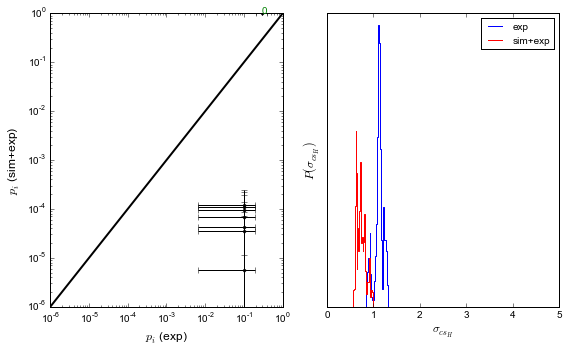

In [4]:
#########################################
# Let's do analysis using MBAR and plot figures
############ MBAR and Figures ###########
# Specify necessary argument values
%matplotlib inline
dataFiles = 'test_cs_H'
A = Analysis(50,dataFiles,'results_ref_normal')
A.plot()
